In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split

from convexmtl_torch.model.ConvexMTLPytorchModel import ConvexMTLPytorchRegressor
from convexmtl_torch.model.GraphLaplacianMTLPytorchModel import GraphLaplacianMTLPytorchRegressor

from convexmtl_torch.model.utils import NeuralNetwork

from sklearn.model_selection import GridSearchCV

from convexmtl_torch.data.MTLSyntheticDataset import MTLCommonRegression

import torch
from torch.nn import MSELoss
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer

from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from copy import copy

from utils import train_gs


In [2]:
max_epochs=50
log_every_n_steps=10
problem = 'common'

In [3]:
mtlds = MTLCommonRegression(n_samples_per_task=100)

X, y = mtlds.X, mtlds.y

if y.ndim < 2:
    y = y[:, None]

ic| tasks: [0, 1, 2]
ic| colors: {0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
             1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
             2: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)}
ic| X_data.shape: (300, 1)


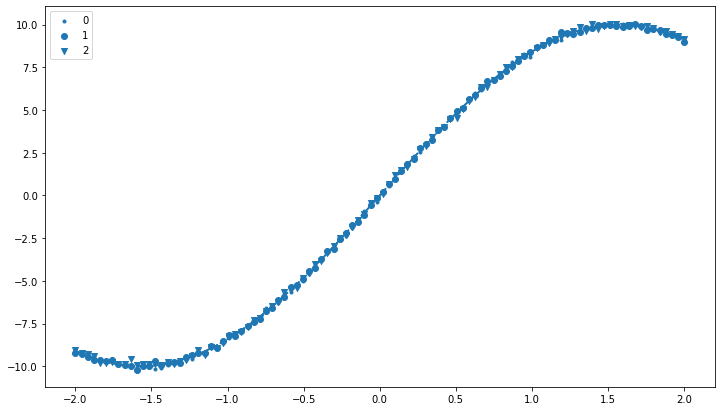

In [4]:
mtlds.plot_data_functions(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_test_numpy = copy(X_test)

## ConvexMTL Torch

In [6]:
model = ConvexMTLPytorchRegressor(lambda_trainable=True, specific_lambda=True, train_mode='lightning')
model

ConvexMTLPytorchRegressor(lambda_trainable=True, specific_lambda=True,
                          weight_decay=0)

In [7]:
wd_l = [10**(-k) for k in range(-3, 0)]
lamblr_l = [10**(-k) for k in range(-3, 0)]

params = {
    'weight_decay' : wd_l,
    'lambda_lr' : lamblr_l,
}

In [8]:
gs = train_gs(model, params, X_train, y_train, model_name='convexmtlNN', problem_name=problem, scoring='neg_mean_squared_error', refit=False)
gs

GridSearchCV(estimator=ConvexMTLPytorchRegressor(lambda_trainable=True,
                                                 specific_lambda=True,
                                                 weight_decay=0),
             param_grid={'lambda_lr': [1000, 100, 10],
                         'weight_decay': [1000, 100, 10]},
             scoring='neg_mean_squared_error')

In [9]:
pred = gs.predict(X_test)

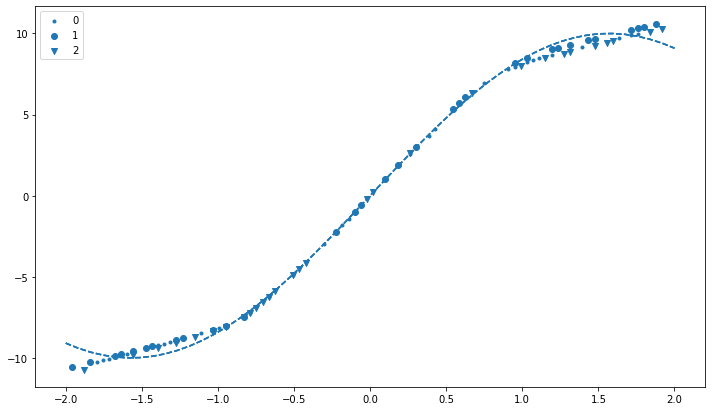

In [10]:
mtlds.plot_data_functions(X_test, pred)

In [11]:
gs.best_estimator_.model.get_lamb()

ic| self.lamb_dic: {0: Parameter containing:
                   tensor([0.6520], requires_grad=True),
                    1: Parameter containing:
                   tensor([0.6546], requires_grad=True),
                    2: Parameter containing:
                   tensor([0.6779], requires_grad=True),
                    3: Parameter containing:
                   tensor([0.5333], requires_grad=True),
                    4: Parameter containing:
                   tensor([0.6431], requires_grad=True)}


{0: array([0.6574549], dtype=float32),
 1: array([0.65803915], dtype=float32),
 2: array([0.66326267], dtype=float32),
 3: array([0.63024515], dtype=float32),
 4: array([0.6554449], dtype=float32)}

## GraphLaplacian Torch

In [12]:
max_epochs=200

In [13]:
model = GraphLaplacianMTLPytorchRegressor(lambda_trainable=True, specific_lambda=True, train_mode='lightning')
model

GraphLaplacianMTLPytorchRegressor(weight_decay=0)

In [14]:
wd_l = [10**(-k) for k in range(-3, 0)]
adjlr_l = [10**(-k) for k in range(-3, 0)]

params = {
    'weight_decay' : wd_l,
    'adj_lr' : adjlr_l,
}

In [15]:
gs = train_gs(model, params, X_train, y_train, model_name='glmtlNN', problem_name=problem, scoring='neg_mean_squared_error', refit=False)
gs

Loss: 7.8151e-01, Tr:0.78(0.78), V:1.31(1.30):  98%|█████████▊| 98/100 [00:01<00:00, 59.88it/s]    


INFO: Early stopping


Loss: 8.2332e-01, Tr:0.82(0.82), V:1.60(1.49):  75%|███████▌  | 75/100 [00:01<00:00, 54.10it/s]    


INFO: Early stopping


Loss: 1.0018e+00, Tr:1.00(1.00), V:1.66(1.50):  79%|███████▉  | 79/100 [00:01<00:00, 42.53it/s]    


INFO: Early stopping


Loss: 6.8043e-01, Tr:0.68(0.68), V:0.65(0.62):  95%|█████████▌| 95/100 [00:01<00:00, 56.27it/s]    


INFO: Early stopping


Loss: 8.0711e-01, Tr:0.81(0.81), V:2.24(1.38):  81%|████████  | 81/100 [00:01<00:00, 40.86it/s]    


INFO: Early stopping


Loss: 6.3672e-01, Tr:0.64(0.64), V:0.83(0.57):  79%|███████▉  | 79/100 [00:02<00:00, 35.75it/s]    


INFO: Early stopping


Loss: 9.3506e-01, Tr:0.94(0.94), V:1.74(1.55):  77%|███████▋  | 77/100 [00:01<00:00, 45.65it/s]    


INFO: Early stopping


Loss: 7.6730e-01, Tr:0.77(0.77), V:0.84(0.71):  89%|████████▉ | 89/100 [00:01<00:00, 45.39it/s]    


INFO: Early stopping


Loss: 1.5474e+00, Tr:1.55(1.55), V:2.50(1.99):  86%|████████▌ | 86/100 [00:01<00:00, 49.54it/s]    


INFO: Early stopping


Loss: 8.6149e-01, Tr:0.86(0.83), V:0.87(0.36):  90%|█████████ | 90/100 [00:02<00:00, 36.53it/s]    


INFO: Early stopping


Loss: 7.1585e-01, Tr:0.72(0.72), V:0.77(0.73):  97%|█████████▋| 97/100 [00:01<00:00, 65.17it/s]    


INFO: Early stopping


Loss: 9.8953e-01, Tr:0.99(0.99), V:0.99(0.92):  78%|███████▊  | 78/100 [00:01<00:00, 61.70it/s]    


INFO: Early stopping


Loss: 5.8370e-01, Tr:0.58(0.58), V:0.88(0.76):  97%|█████████▋| 97/100 [00:01<00:00, 55.01it/s]    


INFO: Early stopping


Loss: 6.8239e-01, Tr:0.68(0.68), V:2.05(1.72):  84%|████████▍ | 84/100 [00:01<00:00, 43.41it/s]    


INFO: Early stopping


Loss: 9.5865e-01, Tr:0.96(0.96), V:1.41(0.96):  78%|███████▊  | 78/100 [00:01<00:00, 43.55it/s]    


INFO: Early stopping


Loss: 8.2227e-01, Tr:0.82(0.82), V:1.50(0.90):  82%|████████▏ | 82/100 [00:01<00:00, 47.17it/s]    


INFO: Early stopping


Loss: 9.8118e-01, Tr:0.98(0.98), V:2.72(1.90):  77%|███████▋  | 77/100 [00:01<00:00, 43.93it/s]    


INFO: Early stopping


Loss: 1.0202e+00, Tr:1.02(1.02), V:1.34(1.10):  81%|████████  | 81/100 [00:01<00:00, 41.20it/s]    


INFO: Early stopping


Loss: 8.9677e-01, Tr:0.90(0.90), V:1.11(0.74):  96%|█████████▌| 96/100 [00:02<00:00, 41.89it/s]    


INFO: Early stopping


Loss: 8.5148e-01, Tr:0.85(0.85), V:0.69(0.34):  94%|█████████▍| 94/100 [00:02<00:00, 40.33it/s]    


INFO: Early stopping


Loss: 9.7121e-01, Tr:0.97(0.97), V:1.06(0.99):  78%|███████▊  | 78/100 [00:01<00:00, 50.47it/s]    


INFO: Early stopping


Loss: 7.4119e-01, Tr:0.74(0.74), V:1.04(0.45):  94%|█████████▍| 94/100 [00:02<00:00, 42.85it/s]    


INFO: Early stopping


Loss: 9.5896e-01, Tr:0.96(0.96), V:0.69(0.69): 100%|██████████| 100/100 [00:02<00:00, 35.95it/s]    


GridSearchCV(estimator=GraphLaplacianMTLPytorchRegressor(weight_decay=0),
             param_grid={'adj_lr': [1000, 100, 10],
                         'weight_decay': [1000, 100, 10]},
             scoring='neg_mean_squared_error')

In [16]:
# pred = model(X_test, t_test)
pred = gs.predict(X_test)

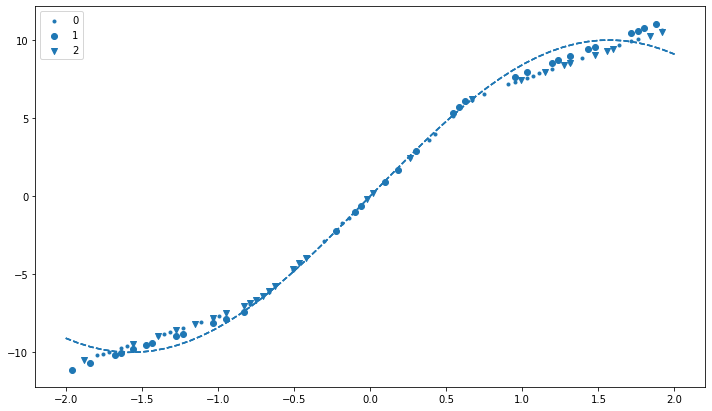

In [17]:
mtlds.plot_data_functions(X_test, pred)

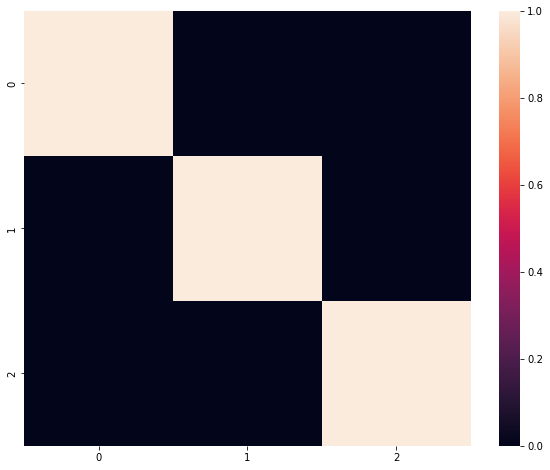

In [19]:
adjMatrix = gs.best_estimator_.model.get_fig_adjMatrix()
plt.show()

## Tensorboard

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=gl_common_logs/